In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline


#  Uploading the data libraries  

In [ ]:
data= ('/content/Superstore Dataset.xlsx')


**In this section, we used various Python libraries such as Pandas, NumPy,  to clean and prepare the dataset for analysis and visualization. Key steps included handling missing values, removing duplicates, correcting data types, and formatting inconsistent entries. The goal is to ensure that the dataset was accurate, consistent, and ready for generating meaningful insights through visualizations.**

In [ ]:
data=pd.read_excel(data)
data.head()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
3,13,CA-2020-114412,2020-04-15,2020-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,33311.0,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,5.4432
4,14,CA-2019-161389,2019-12-05,2019-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,33311.0,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,132.5922


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Row ID+O6G3A1:R6  5899 non-null   int64         
 1   Order ID          5899 non-null   object        
 2   Order Date        5899 non-null   datetime64[ns]
 3   Ship Date         5899 non-null   datetime64[ns]
 4   Ship Mode         5899 non-null   object        
 5   Customer ID       5899 non-null   object        
 6   Customer Name     5899 non-null   object        
 7   Segment           5899 non-null   object        
 8   Country           5899 non-null   object        
 9   City              5899 non-null   object        
 10  State             5899 non-null   object        
 11  postal Code       5896 non-null   float64       
 12  Region            5899 non-null   object        
 13  Product ID        5899 non-null   object        
 14  Category          5899 n

In [ ]:
ColumnName= data
ColumnName.columns

Index(['Row ID+O6G3A1:R6', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Profit'],
      dtype='object')

In [ ]:
data.shape

(5899, 20)

In [ ]:
data.rename(columns={'Row ID+O6G3A1:R6' : 'Row ID'}, inplace=True)
#correct rename for better understanding

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
3,13,CA-2020-114412,2020-04-15,2020-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,33311.0,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,5.4432
4,14,CA-2019-161389,2019-12-05,2019-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,33311.0,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,132.5922


In [ ]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit
5894,9989,CA-2020-163629,2020-11-17,2020-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,30318.0,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,55.6470
5895,9991,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,90036.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,15.6332
5896,9992,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,90049.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,19.3932
5897,9993,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,90049.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,13.3200
5898,9994,CA-2020-119914,2020-05-04,2020-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,47374.0,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,72.9480


In [ ]:
data.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [ ]:
data.isnull().sum()


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
#to fill null value of postal code with 0
data['postal Code'].fillna(10, inplace=True)

<ipython-input-16-b64f60bcea1c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['postal Code'].fillna(10, inplace=True)


In [ ]:
data.info()
#checking the null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         5899 non-null   int64         
 1   Order ID       5899 non-null   object        
 2   Order Date     5899 non-null   datetime64[ns]
 3   Ship Date      5899 non-null   datetime64[ns]
 4   Ship Mode      5899 non-null   object        
 5   Customer ID    5899 non-null   object        
 6   Customer Name  5899 non-null   object        
 7   Segment        5899 non-null   object        
 8   Country        5899 non-null   object        
 9   City           5899 non-null   object        
 10  State          5899 non-null   object        
 11  postal Code    5899 non-null   float64       
 12  Region         5899 non-null   object        
 13  Product ID     5899 non-null   object        
 14  Category       5899 non-null   object        
 15  Sub-Category   5899 n

In [ ]:
data.describe()

,Row ID,Order Date,Ship Date,postal Code,Sales,Quantity,Profit
count,5899.000000,5899,5899,5899.000000,5899.000000,5899.000000,5899.000000
mean,5022.428208,2020-02-29 02:22:48.231903744,2020-02-27 19:42:27.889472768,55385.837769,227.567529,3.782506,29.705788
min,1.000000,2019-01-02 00:00:00,2019-01-01 00:00:00,10.000000,0.444000,1.000000,-6599.978000
25%,2485.500000,2019-09-11 00:00:00,2019-09-11 00:00:00,23271.500000,17.476000,2.000000,1.797500
50%,5091.000000,2020-03-16 00:00:00,2020-03-14 00:00:00,56301.000000,53.424000,3.000000,8.502500
75%,7460.000000,2020-09-13 12:00:00,2020-09-14 00:00:00,90004.000000,206.049600,5.000000,28.616600
max,9994.000000,2020-12-30 00:00:00,2020-12-31 00:00:00,99301.000000,17499.950000,14.000000,8399.976000
std,2878.464633,NaN,NaN,31907.627446,622.985836,2.212972,259.632847


In [ ]:
#to drop postal code
data.drop('postal Code', axis=1, inplace=True)

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
3,13,CA-2020-114412,2020-04-15,2020-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,5.4432
4,14,CA-2019-161389,2019-12-05,2019-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,132.5922


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.to_excel('superstore data cleaned.xlsx', index=False)
from google.colab import files
files.download('superstore data cleaned.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
daily_sales = data.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales = daily_sales.sort_values('Order Date')

monthly_sales = daily_sales.set_index('Order Date').resample('ME').mean()

**After cleaning the dataset, to explore various combinations of features to generate insightful visualizations that reveal patterns and trends. By analyzing sales data through different approaches such as product categories, quantities, and profit margins,  to better understand business performance. These visuals help in identifying high-performing segments, seasonal trends, and areas for strategic improvement**

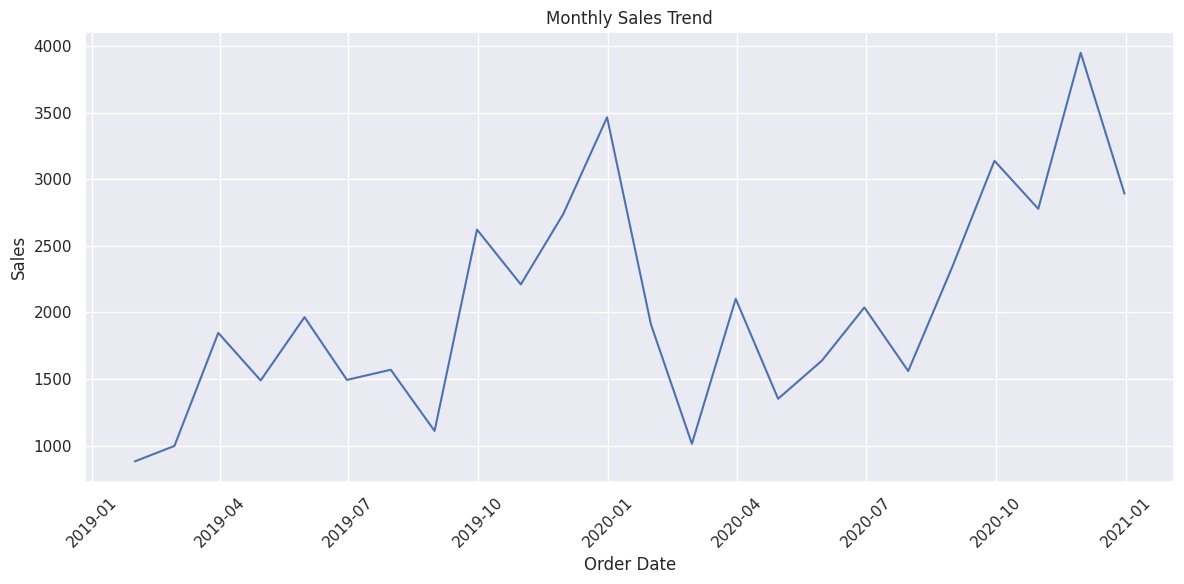

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Order Date', y='Sales', data=monthly_sales)
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A close look into monthly sales tells hence of a dynamic behaviour whose characteristic is sharp spikes, which appear to follow key consumer events such as promotions or holidays. Such trends monitoring can help businesses to identify upward or downward trends, which is helpful for a sound strategic planning as well as for future predictions.

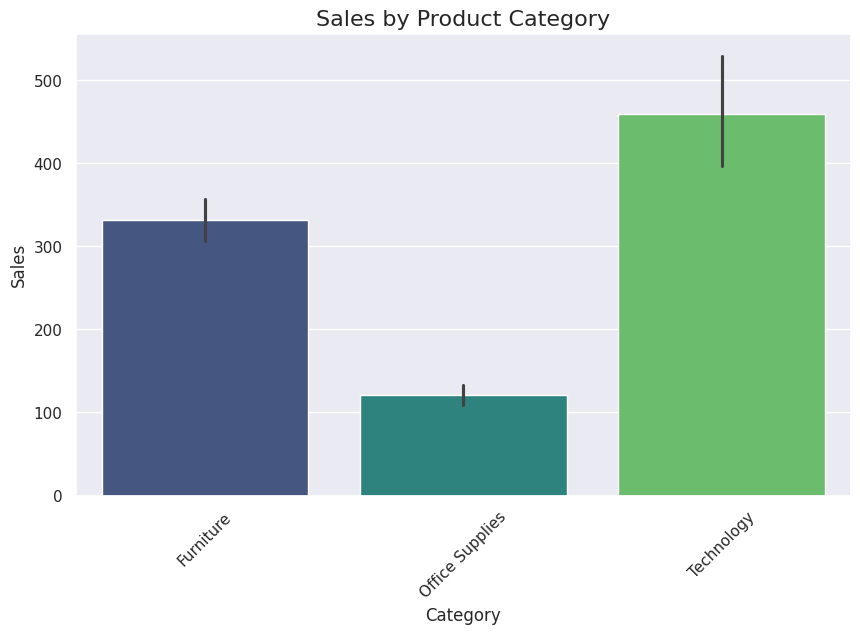

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=data, hue='Category', palette='viridis', legend=False)
plt.title('Sales by Product Category', fontsize=16)
plt.xticks(rotation=45)
plt.show()


The highest sales are in the technology category, which is indicative of a strong interest by the customers and possibly more expensive products raking in the money. Furniture ranks second with constant sales, while Office Supplies ranks last with low sales or low product appeal. Such patterns are valuable in somewhat directing the resources allocation and the construction of marketing plans.

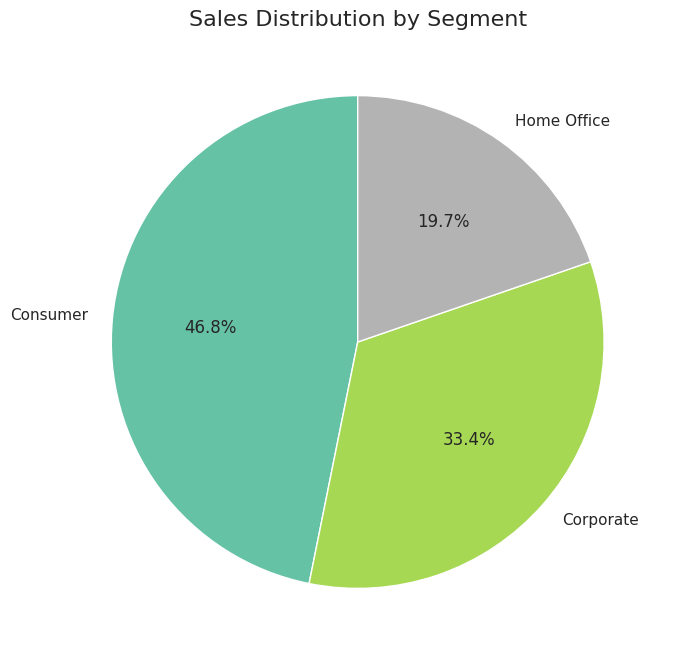

In [ ]:
# Pie chart: Sales Distribution by Segment
segment_sales = data.groupby('Segment')['Sales'].sum()
plt.figure(figsize=(8,8))
segment_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='Set2')
plt.title('Sales Distribution by Segment', fontsize=16)
plt.ylabel('')  # Hide the y-axis label
plt.show()


According to the pie chart, the consumer segment is the leading sales performer, with 46.8% sales demonstrating crucial impact on the business development. Following with 33.4% is corporate segment that shows considerable but minimal participation in sales. To conclude, home office segment, with 19.7% sales share indicates a good, but small contribution, which could be a potential area to target for future growth initiatives.

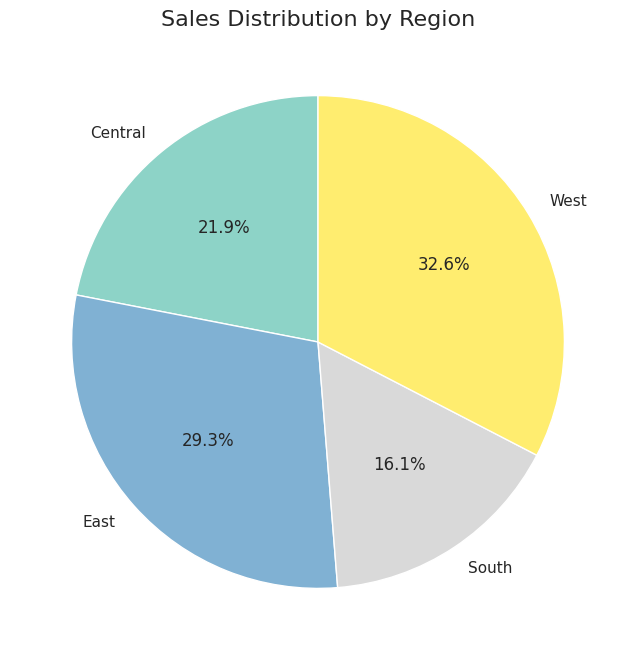

In [ ]:

region_sales = data.groupby('Region')['Sales'].sum()
plt.figure(figsize=(8,8))
region_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='Set3')
plt.title('Sales Distribution by Region', fontsize=16)
plt.ylabel('')
plt.show()

Pie chart analysis shows that the installation has the highest sales volume that is likely due to the fact that the West and East regions include giant urban conglomerations and have a greater number of customers. Central and South regions have low sales that can be attributed to small customers base or minimal penetration of market.
Improving the underperforming regions’ growth can be enabled through certain regional marketing campaigns, maximization of delivery systems, or through production of products customized to local preferences.

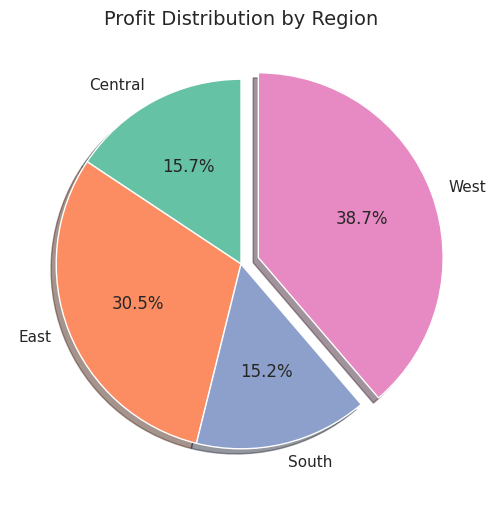

In [ ]:
region_profit = data.groupby('Region')['Profit'].sum()
explode = (0, 0, 0, 0.1)  # Highlight the first region by using numbers i mentioned the last one which has greater values

plt.figure(figsize=(10, 6))
plt.pie(region_profit, labels=region_profit.index, autopct='%1.1f%%',
        explode=explode, shadow=True, startangle=90, colors=sns.color_palette('Set2'))
plt.title('Profit Distribution by Region', fontsize=14)
plt.show()

The chart in pie form states which of the regions are reaping the most profits. One can clearly see from the chart that East and West parts dominate in profits, parallel to patterns displayed with high sales amounts on these regions. Thorough sales of East and West regions have direct relationship with their better profitability. The South and Central regions have lower contribution to total profit meaning there are opportunities for advancing sales methods and managing costs accordingly.

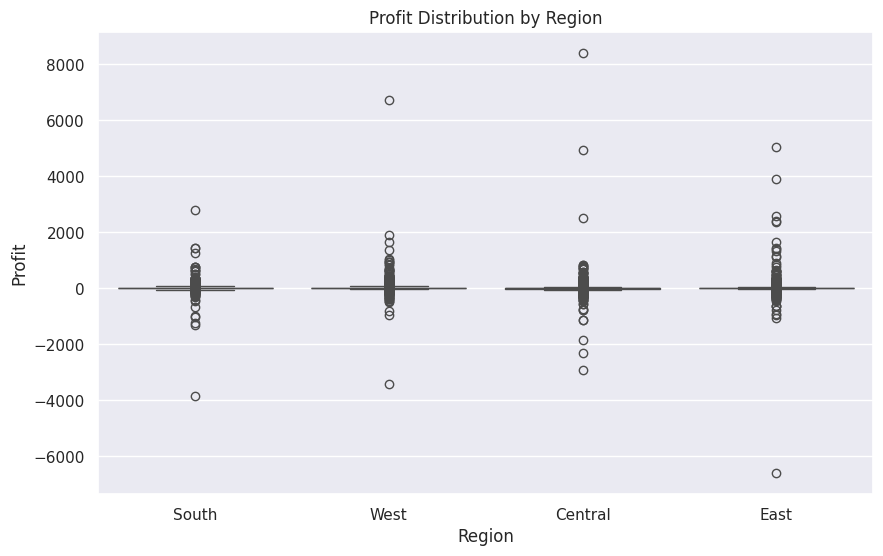

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Region', y='Profit', data=data)
plt.title("Profit Distribution by Region")
plt.show()

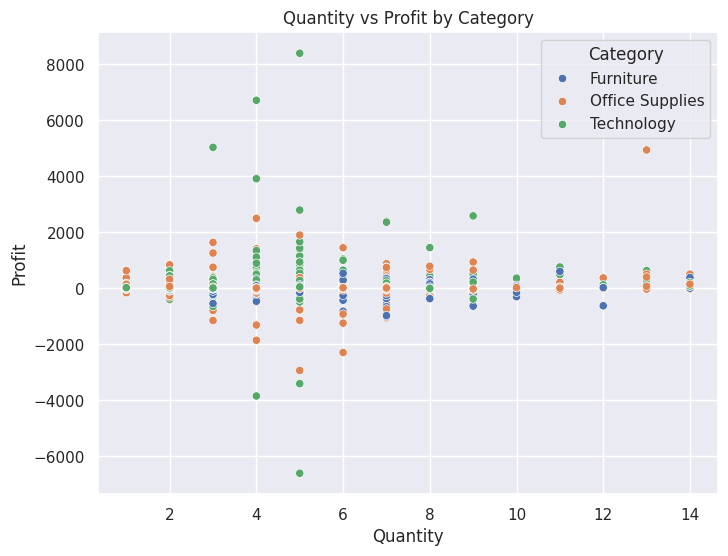

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Quantity', y='Profit', hue='Category', data=data)
plt.title("Quantity vs Profit by Category")
plt.show()

From the scatter plot we can see that there is a strong correlation between Quantity and Profit against different product categories. The 'Technology' category is distinct because of higher profits when quantities rise, meaning that large sale in such a niche is likely to improve the profitability. This discovery can inform technology businesses to develop special plans to increase their profitability.

In [ ]:
data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)


,Sales
Sub-Category,
Phones,184302.5460
Chairs,179472.9980
Storage,128466.3180
Binders,122471.3700
Tables,121726.7430
Copiers,112498.7980
Accessories,101842.0860
Machines,99451.5610
Appliances,68977.2470


In [ ]:
# Create a new DataFrame with average profit by sub-category to run  the next visuals
avg_profit_data = data.groupby('Sub-Category')['Profit'].mean().reset_index()
avg_profit_data = avg_profit_data.sort_values('Profit', ascending=False)
avg_profit_data.rename(columns={'Profit': 'Average Profit'}, inplace=True)


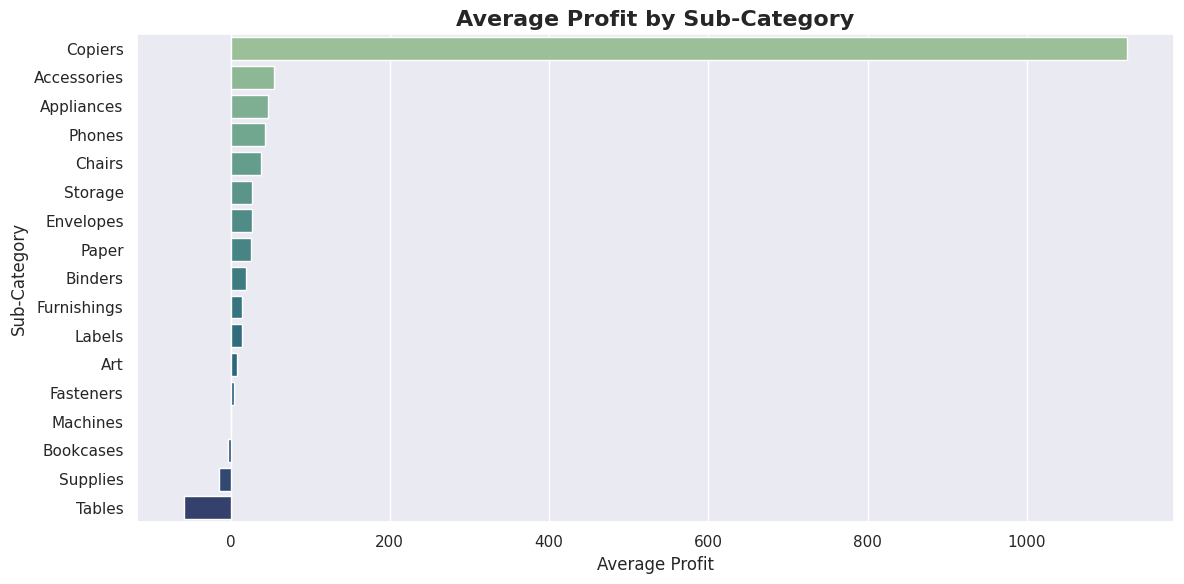

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=avg_profit_data,
    x='Average Profit',
    y='Sub-Category',
    hue='Sub-Category',
    palette='crest',
    legend=False
)
plt.title("Average Profit by Sub-Category", fontsize=16, weight='bold')
plt.xlabel("Average Profit")
plt.ylabel("Sub-Category")
plt.tight_layout()
plt.show()


The bar plot illustrates the average profit for each sub-category, highlighting the most and least profitable sub-categories. The visual is designed with a vibrant color palette, making it easy to identify trends and outliers, offering valuable insights for strategic decision-making.

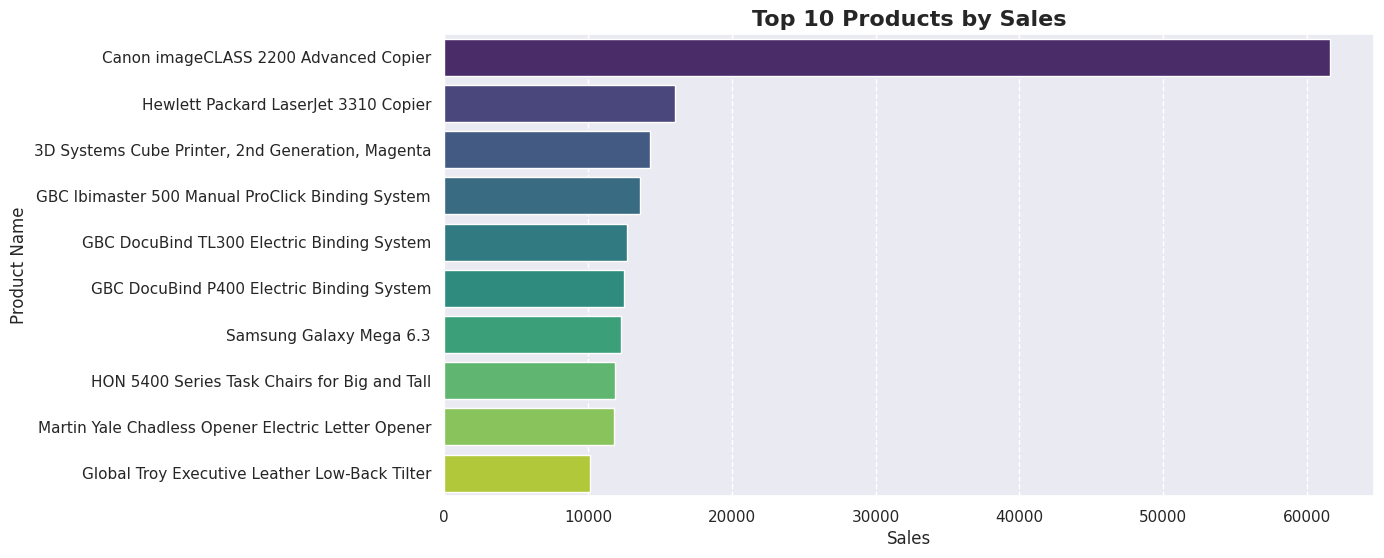

In [ ]:
plt.figure(figsize=(12, 6))
top_products = data.groupby('Product Name')['Sales'].sum().nlargest(10)
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette='viridis', legend=False)
plt.title('Top 10 Products by Sales', fontsize=16, weight='bold')
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.grid(axis='x', linestyle='--')
plt.show()


The top 10 products in sales reflect the most wanted items, probably because of the influence of market trends, sales promotions, or consumer behavior. The large volumes of sale of specific products indicate their contribution to a considerable amount of income which can be further emphasized and resources of the company may be directed towards these.

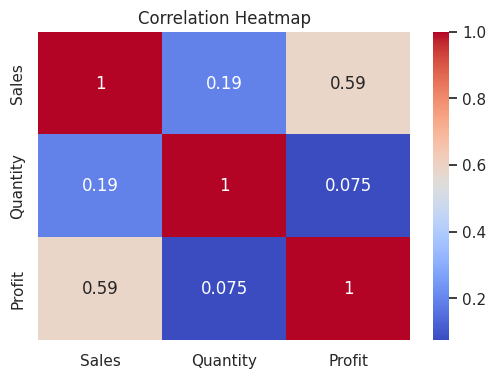

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(data[['Sales', 'Quantity', 'Profit']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

The heatmap shows a clear positive correlation between Sales and Profit meaning that as sales activity increases profitability also tends to go up. There is an evident positive correlation between Quantity and sales that is, when sales increase, there is a tendency that more units will be sold. However, Quantity and Profit do not have a strong relationship.

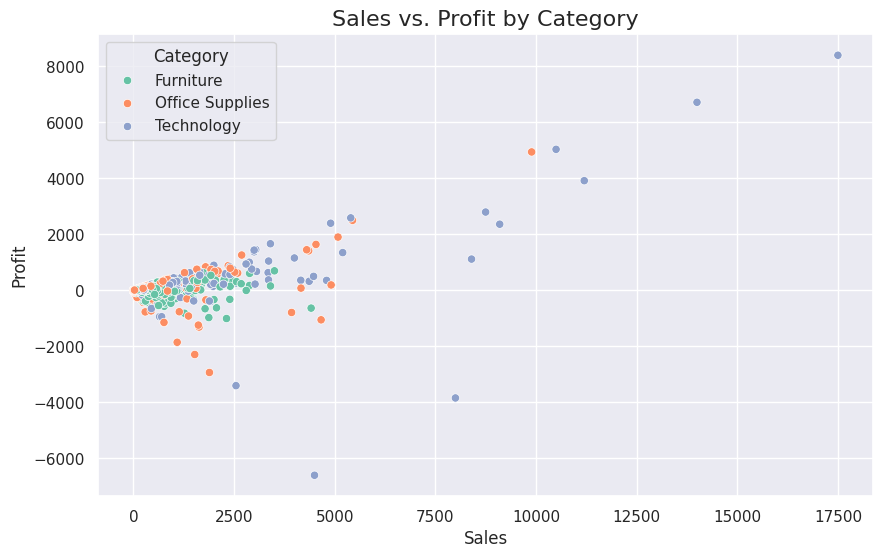

In [ ]:

plt.figure(figsize=(10,6))
sns.scatterplot(x='Sales', y='Profit', data=data, hue='Category', palette='Set2')
plt.title('Sales vs. Profit by Category', fontsize=16)
plt.show()

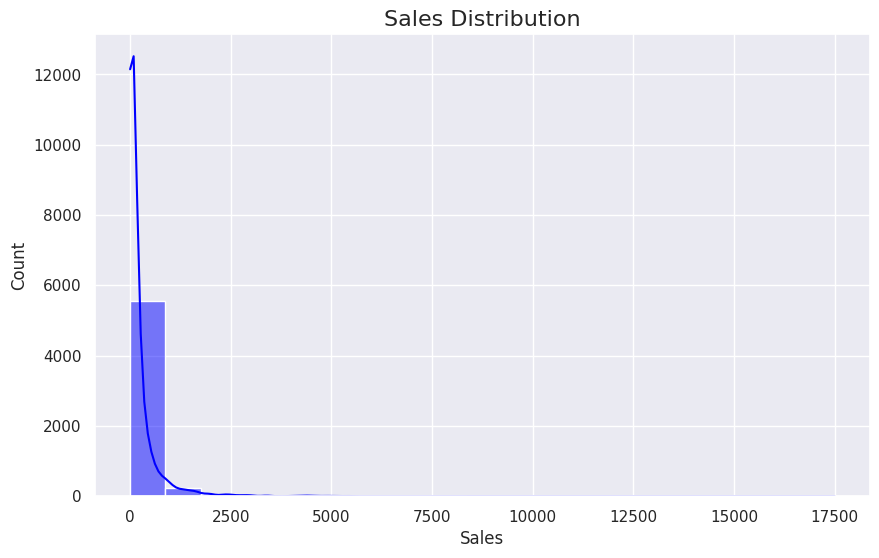

In [ ]:

plt.figure(figsize=(10,6))
sns.histplot(data['Sales'], kde=True, bins=20, color='blue')
plt.title('Sales Distribution', fontsize=16)
plt.show()

The histogram shows the sales frequency distribution, complemented by the smooth Kernel Density Estimate (KDE) curve, to emphasize the general form of the data. It is the low end of the sale where most sales occur; there are a few isolated cases of high-sell and a very high number of small sales. The statistics indicate how the smaller sales rule the roost, while there are a few significant purchases, which hold the key to a strong increase in total sales overall.

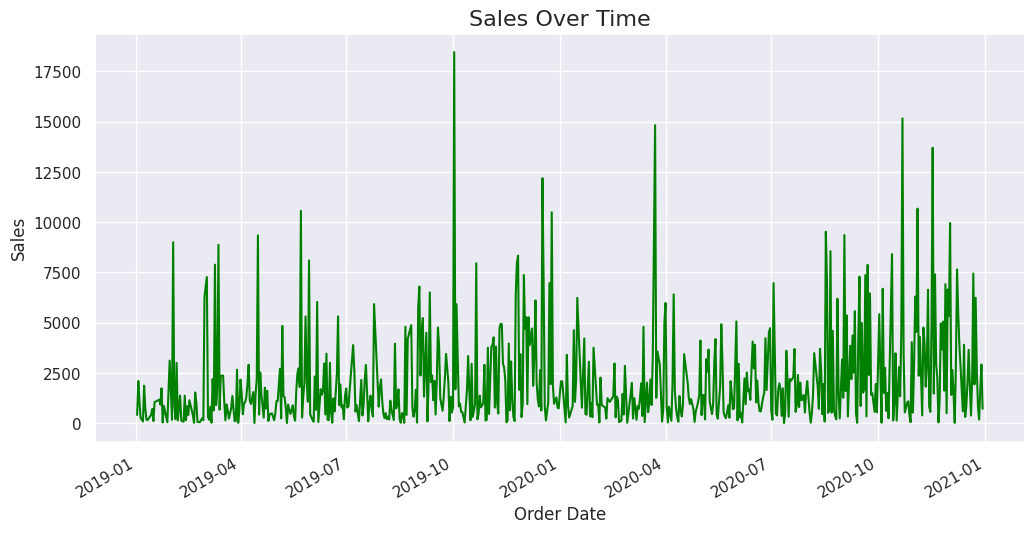

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])  # Make sure it's in datetime format
sales_by_date = data.groupby('Order Date')['Sales'].sum()

plt.figure(figsize=(12,6))
sales_by_date.plot(kind='line', color='green')
plt.title('Sales Over Time', fontsize=16)
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

Through the graphical representation of this data over time, the line plot focuses on variations and shows the major point of sales peaks and drops. From the analysis of the general trend, businesses are in a position to identify seasonal patterns, change in demand or exceptional occurrences that may require follow-up investigation or adjustments.

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

<Figure size 1200x600 with 0 Axes>

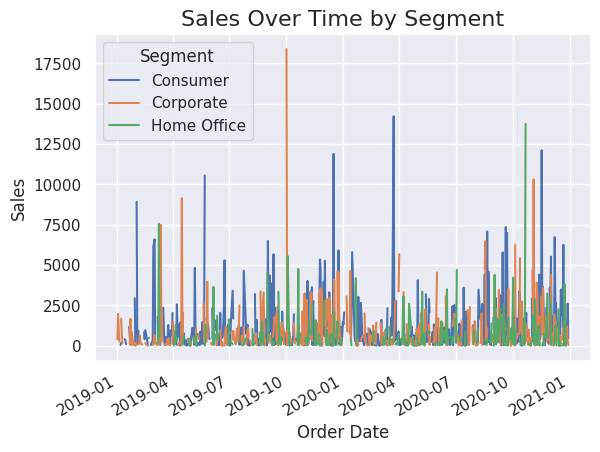

In [ ]:
sales_by_date_segment = data.groupby(['Order Date', 'Segment'])['Sales'].sum().unstack()
plt.figure(figsize=(12,6))
sales_by_date_segment.plot(kind='line')
plt.title('Sales Over Time by Segment', fontsize=16)
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


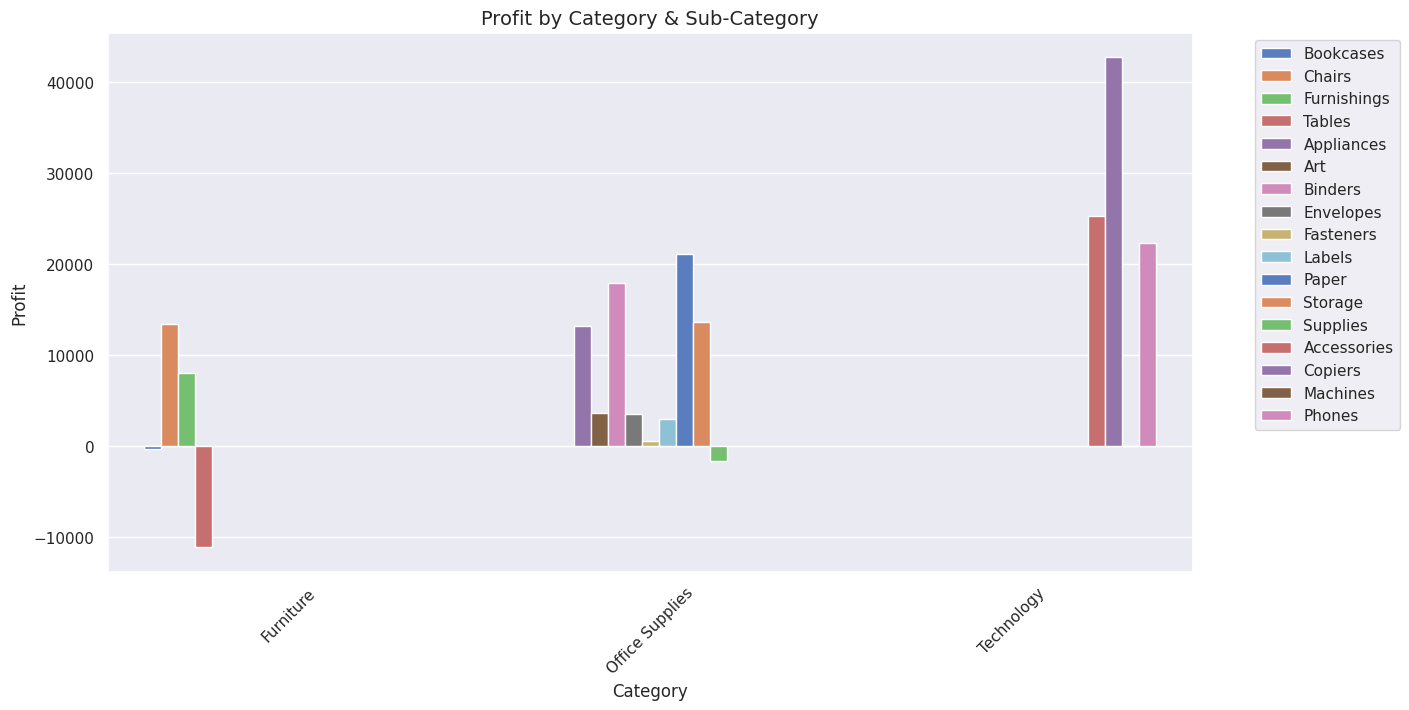

In [ ]:
plt.figure(figsize=(14, 7))
category_profit = data.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index()
sns.barplot(x='Category', y='Profit', hue='Sub-Category', data=category_profit, palette='muted')
plt.title('Profit by Category & Sub-Category', fontsize=14)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

This figure demonstrates the cumulative profit made by each Sub-Category in its Category layout. It distinctly lists the sub categories which generate the most or the least income for each Category. For instance, take the "Technology" category, with sub-categories like "Copiers" known for high profits and contrasted with others, such as “Tables” in “Furniture”, where reporting lower or even negative profits (thereby indicating opportunities for targeting and saving) is common.

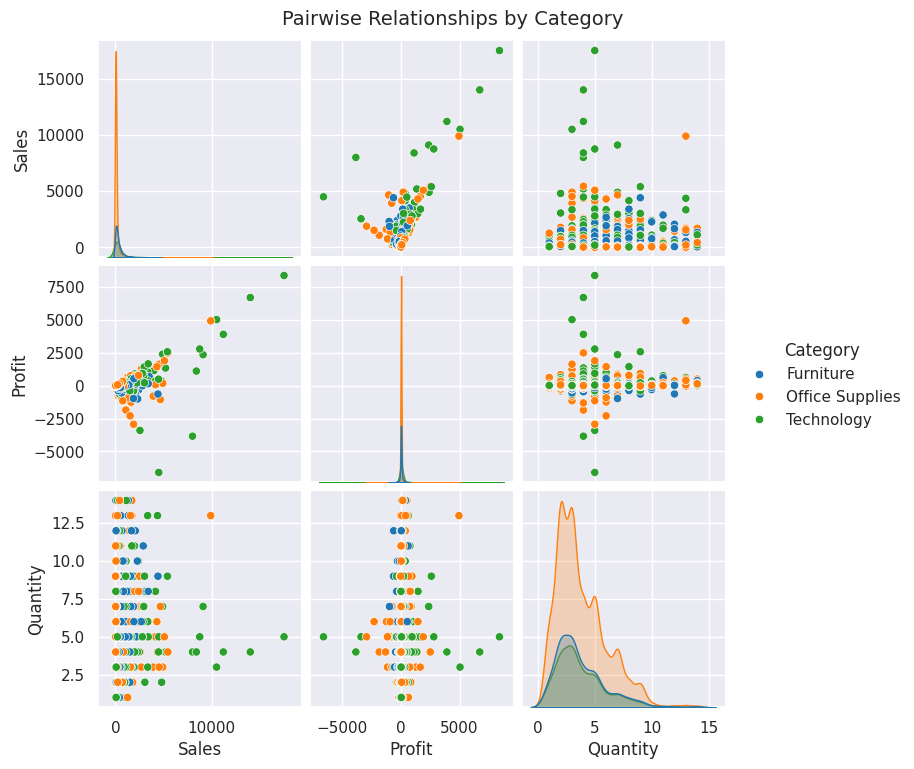

In [ ]:
sns.pairplot(data[['Sales', 'Profit', 'Quantity', 'Category']], hue='Category', palette='tab10')
plt.suptitle('Pairwise Relationships by Category', y=1.02, fontsize=14)
plt.show()

The pairplot visualizes the relationships between Sales, Profit, and Quantity across different product Categories—Furniture, Office Supplies, and Technology. It reveals distinct patterns: Technology generally shows higher sales and profit values, indicating it's the most profitable category. Furniture has more scattered data, reflecting inconsistent profit margins, possibly due to variable costs or discounts. Office Supplies tend to cluster at lower sales and profit, suggesting smaller, more frequent transactions with lower margins. The Quantity axis shows that higher quantities don’t always translate into higher profit especially in the Furniture category highlighting the need to focus on high-margin products rather than just volume. This visual helps stakeholders identify which categories drive revenue and where strategic pricing or marketing adjustments could be most effective.